In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

In [2]:
# Hàm đọc ảnh từ tệp nhị phân
def read_image(filename, size):
    # Đọc dữ liệu từ tệp nhị phân
    img = np.fromfile(filename, dtype=np.uint8).reshape((size, size)).astype(np.float32)
    return img

In [3]:
def show_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    if len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else: 
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def save_image(data, filename, cmap='gray', vmin=None, vmax=None):
    plt.figure()
    plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()  

In [4]:
size = 256
N = size * size

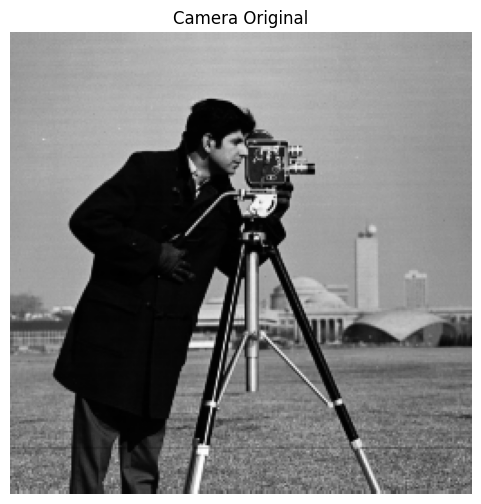

In [5]:
# Đọc ảnh Cameraman
I6 = read_image('../data/camerabin.sec', 256)
show_image("Camera Original", I6)

In [6]:
# Chuyển đổi sang miền tần số (DFT)
dft = np.fft.fft2(I6)
dft_shifted = np.fft.fftshift(dft)  # Đưa zero-frequency vào trung tâm
    
# Tính biên độ và pha
magnitude = np.abs(dft_shifted)
phase = np.angle(dft_shifted)
    
# Biến đổi ngược với điều chỉnh pha
J1tilde = magnitude * np.exp(1j * 0)  # Pha = 0
J2tilde = 1 * np.exp(1j * phase)  # Biên độ = 1

# Chuyển về miền không gian
J1 = np.fft.ifft2(np.fft.ifftshift(J1tilde)).real
J2 = np.fft.ifft2(np.fft.ifftshift(J2tilde)).real
    
# Nén log phạm vi động
J1_log = np.log(np.maximum(J1, 1e-5))  # Tránh log(0)

# Chuẩn hóa về kiểu uint8
J1_scaled = cv2.normalize(J1_log, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
J2_scaled = cv2.normalize(J2, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

In [7]:
# Lưu file nhị phân
J1_scaled.tofile("J1prime.bin")
J2_scaled.tofile("J2.bin")

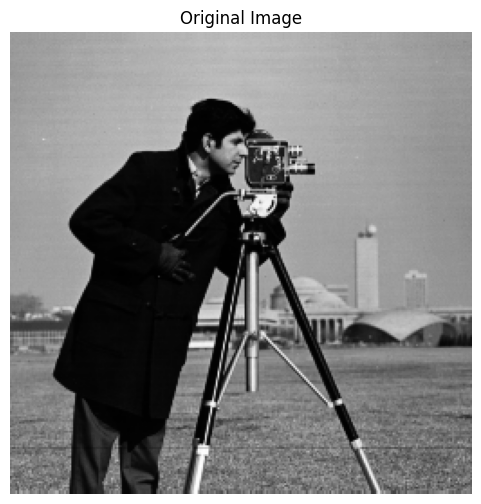

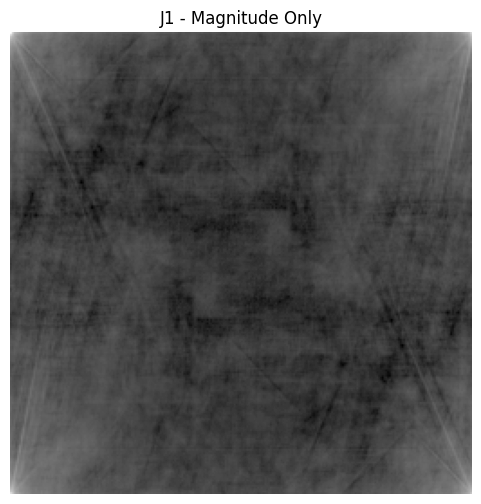

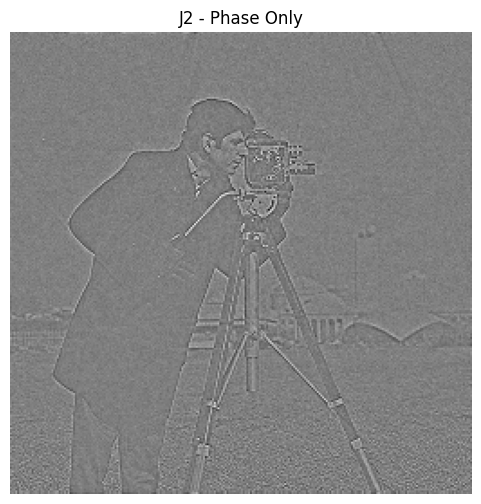

In [8]:
# Hiển thị ảnh
show_image("Original Image", I6)
show_image("J1 - Magnitude Only", J1_scaled)
show_image("J2 - Phase Only", J2_scaled)

save_image(I6, "camera_original")
save_image(J1_scaled, "J1'")
save_image(J2_scaled, "J2")